# Transports through sections in NEMO

All transports are computed by the nemo_postprocessing.sh script by Willi Rath / Sebastian Wahl. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean 

In [2]:
import foci_functions

In [26]:
from importlib import reload
foci_functions = reload(foci_functions)

In [27]:
exp_list = ['FOCI_GJK029']
time_list = [slice('2050-01-01','2550-01-01')]

In [28]:
transports = foci_functions.read_transports(exp_list, time_list)

In [29]:
# list all transports
transports[0]

<xarray.Dataset>
Dimensions:     (time: 500)
Coordinates:
  * time        (time) object 2050-07-01 00:00:00 ... 2549-07-01 00:00:00
Data variables: (12/18)
    vtrp_afaus  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_ameaf  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_ausaa  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_ausam  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_baffi  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_berin  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    ...          ...
    vtrp_fram   (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_icsco  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_itflo  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_kergu  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_mozam  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
    vtrp_soafr  (time) float32 dask.array<chunksize=(500,), meta=np.ndarray>
Attributes:
    long_name:         Africa-Australia_Volume_Transport
    units:             Sverdrup
    short_name:        vtrp
    iweight:           1
    online_operation:  N/A
    axis:              T
    savelog10:         0.0

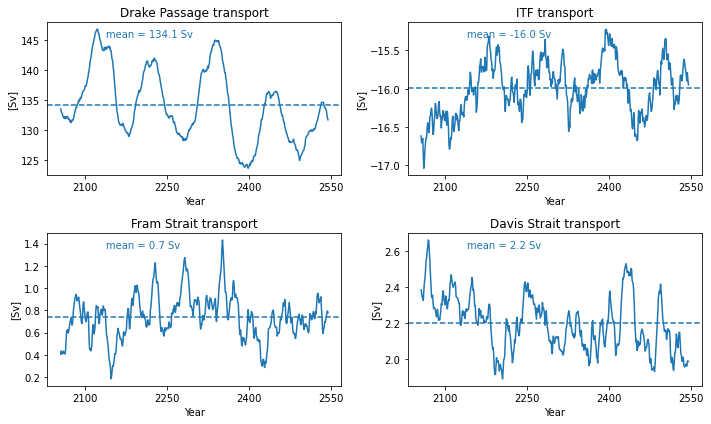

In [52]:
## Plot transports
fig1, axs1 = plt.subplots(2,2, figsize=(10,6))
ax1 = axs1.flat

transp = ['vtrp_drake','vtrp_itflo','vtrp_fram','vtrp_davis']
names  = ['Drake Passage', 'ITF', 'Fram Strait', 'Davis Strait']

for i,tr in enumerate(transp):
    
    for j,transport in enumerate(transports):
        
        x = transport[tr].rolling(time=11,center=True).mean()
        p, = x.plot(ax=ax1[i], label=exp_list[j])
        
        xm = x.mean('time')
        ax1[i].axhline(y=xm.data, linestyle='dashed', c=p.get_color())
        ax1[i].text(0.2, 0.9, 'mean = %3.1f Sv' % (xm.data,), 
                    transform=ax1[i].transAxes,
                    color=p.get_color())
        
        ax1[i].set_title('%s transport' % (names[i],))

for ax in ax1:
    ax.set_ylabel('[Sv]')
    ax.set_xlabel('Year')
    
fig1.tight_layout()
fig1.savefig('plots/nemo_transports.pdf',format='pdf')